Predictive Modeling; This data has 5 independent variables and Sound_pressure_level as the dependent variable (to be predicted). The data set is taken from UCI Machine Learning repository. 



In [ ]:
import pandas as pd
import numpy as np
import os


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Google Collab ML data repository/UCI ML data (pressure)"
os.chdir(path)

train=pd.read_csv("airfoil_self_noise.csv")

In [ ]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frquency(Hz)          1503 non-null   int64  
 1   Angle_of_Attack       1503 non-null   float64
 2   Chord_Length          1503 non-null   float64
 3   Free_stream_velocity  1503 non-null   float64
 4   Displacement          1503 non-null   float64
 5   Sound_pressure_level  1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [ ]:
train.head()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [ ]:
train.shape

(1503, 6)

In [ ]:
#check for missing values
nans=train.shape[0]-train.dropna().shape[0]
print("No of missing values are ",nans)

No of missing values are  0


In [ ]:
# No missing value. 
train.isnull().sum()

Frquency(Hz)            0
Angle_of_Attack         0
Chord_Length            0
Free_stream_velocity    0
Displacement            0
Sound_pressure_level    0
dtype: int64

In [ ]:
#check correlation matrix so as to avoid multicollinearity
train.corr()
#Angle_of_Attack and displacement sho 75% correlation. Usually >80% corr is considered high. 
#So, we can forego this combination and won't remove any variable.


,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
Frquency(Hz),1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle_of_Attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Displacement,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound_pressure_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [ ]:
#train and test cases
y = train['Sound_pressure_level']
X = train.drop(['Sound_pressure_level'],axis=1)

In [ ]:
#categorical variable search
cat = X.select_dtypes(include=['O'])
cat.apply(pd.Series.nunique,axis=0)

Series([], dtype: float64)

In [ ]:
#Since values of different features vary a lot, Normalize them 
mu = X.mean(axis=0)
sigma = X.std(axis=0)
X = (X - mu)/sigma
X.head()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement
0,-0.661802,-1.146021,1.798701,1.312498,-0.64459
1,-0.598362,-1.146021,1.798701,1.312498,-0.64459
2,-0.519062,-1.146021,1.798701,1.312498,-0.64459
3,-0.408041,-1.146021,1.798701,1.312498,-0.64459
4,-0.281161,-1.146021,1.798701,1.312498,-0.64459


Convert dataframe to numpy array. Need numpy to perform calculations, pandas to import the data set in csv format. 


In [ ]:
#Convert dataframe to numpy array. 
X_arr = X.to_numpy()
y_arr = y.to_numpy()

m = y_arr.size
print(X)

      Frquency(Hz)  Angle_of_Attack  ...  Free_stream_velocity  Displacement
0        -0.661802        -1.146021  ...              1.312498     -0.644590
1        -0.598362        -1.146021  ...              1.312498     -0.644590
2        -0.519062        -1.146021  ...              1.312498     -0.644590
3        -0.408041        -1.146021  ...              1.312498     -0.644590
4        -0.281161        -1.146021  ...              1.312498     -0.644590
...            ...              ...  ...                   ...           ...
1498     -0.122560         1.489947  ...             -0.723104      3.171717
1499      0.083620         1.489947  ...             -0.723104      3.171717
1500      0.353241         1.489947  ...             -0.723104      3.171717
1501      0.670443         1.489947  ...             -0.723104      3.171717
1502      1.082804         1.489947  ...             -0.723104      3.171717

[1503 rows x 5 columns]


In [ ]:
X_arr = np.concatenate([np.ones((m,1)),X_arr],axis=1)

In [ ]:
########### Another way to concatenate()
#one = np.ones(m)
#X_arr = np.stack([one.reshape(m,-1),X_arr],axis=1)
#X_arr = np.hstack([a.reshape(m,-1) for a in [one, X_arr]])
print(X_arr.shape)

(1503, 6)


In [ ]:
def computeCost(X, y, theta):
  m = y.size  # number of training examples
  J = (1/(2*m))*np.sum((np.dot(X,theta)-y)**2)
  return J

In [ ]:
#checking J
J = computeCost(X_arr, y_arr, theta=np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]))
print(J)

7815.786204458416


In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]  # number of training examples
  theta = theta.copy()
  temp = theta.copy()
  J_history = [] # Use a python list to save cost in every iteration
  for i in range(num_iters):
    temp = temp - alpha*(1/m)*np.dot(np.transpose(X),(np.dot(X,theta)-y))
    theta = temp.copy()
    J_history.append(computeCost(X, y, theta))
  
  return theta, J_history

In [ ]:
#Method 1: Without Validation data

theta=np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X_arr ,y_arr, theta, alpha, iterations)
theta;
J_history;


Text(0, 0.5, 'J(theta)')

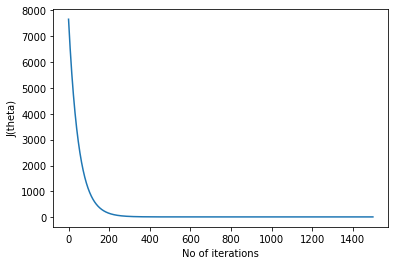

In [ ]:
#check if gradient descent working properly 
from matplotlib import pyplot

pyplot.plot(J_history,'-')
pyplot.xlabel('No of iterations')
pyplot.ylabel('J(theta)')

In [ ]:
#predictions using training data
predict = np.dot(X_arr,theta)


(1503,)


In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y, predict)
print('Mean Absolute Error on Training Data (Before Splitting):  ',MAE)

rmse = mean_squared_error(y, predict, squared=False)
print('Root Mean Square Error: ',rmse)

Mean Absolute Error on Training Data (Before Splitting):   3.727818972399576
Root Mean Square Error:  4.79975776801842


In [ ]:
#Method 2: With Validation data 
#Splitting train and test data for validation 
from sklearn.model_selection import train_test_split

Train_X, val_X, Train_y, val_y = train_test_split(X_arr,y_arr,test_size=0.3,train_size=0.7,random_state=1)


[124.95428414  -4.05019366  -2.39929901  -3.37562356   1.47678058
  -2.06616398]


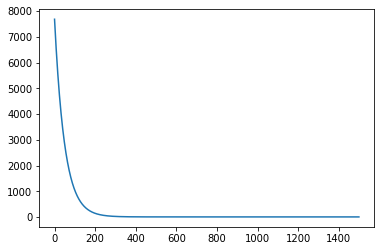

In [ ]:
#performing gradient descent for finding min theta
theta=np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
# gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(Train_X ,Train_y, theta, alpha, iterations)
print(theta)
pyplot.plot(J_history)


In [ ]:
predictions = np.dot(val_X,theta)

In [ ]:
MAE = mean_absolute_error(val_y,predictions)
print('Mean Absolute Error (after splitting):  ',MAE)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(val_y, predictions, squared=False)
print('Root Mean Square Error: ',rmse)

Mean Absolute Error (after splitting):   3.8819449123793808
Root Mean Square Error:  4.976813357058133


In [ ]:
#Method 3: using Linear Regression Class
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(Train_X,Train_y)
Y_Pred = linear_regressor.predict(val_X)

In [ ]:
MAE = mean_absolute_error(val_y,Y_Pred)
print('Mean Absolute Error: ',MAE)

Mean Absolute Error:  3.882016812069881


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(val_y, Y_Pred, squared=False)
print('Root Mean Square Error: ',rmse)

Root Mean Square Error:  4.97823738797826
